In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
input_img = Input(shape = (784,))

In [4]:
encoded = Dense(128, activation = 'relu')(input_img)
decoded = Dense(784, activation = 'sigmoid')(encoded)

In [5]:
autoencoder = Model(input_img, decoded)

In [6]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [7]:
autoencoder.fit(x_train, x_train, epochs=5, batch_size=28, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/5
2143/2143 [==============================] - 5s 2ms/step - loss: 0.1128 - val_loss: 0.0770
Epoch 2/5
2143/2143 [==============================] - 5s 2ms/step - loss: 0.0734 - val_loss: 0.0702
Epoch 3/5
2143/2143 [==============================] - 5s 2ms/step - loss: 0.0696 - val_loss: 0.0684
Epoch 4/5
2143/2143 [==============================] - 5s 2ms/step - loss: 0.0683 - val_loss: 0.0675
Epoch 5/5
2143/2143 [==============================] - 5s 2ms/step - loss: 0.0676 - val_loss: 0.0670


In [8]:
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = encoded_imgs

313/313 [==============================] - 0s 927us/step


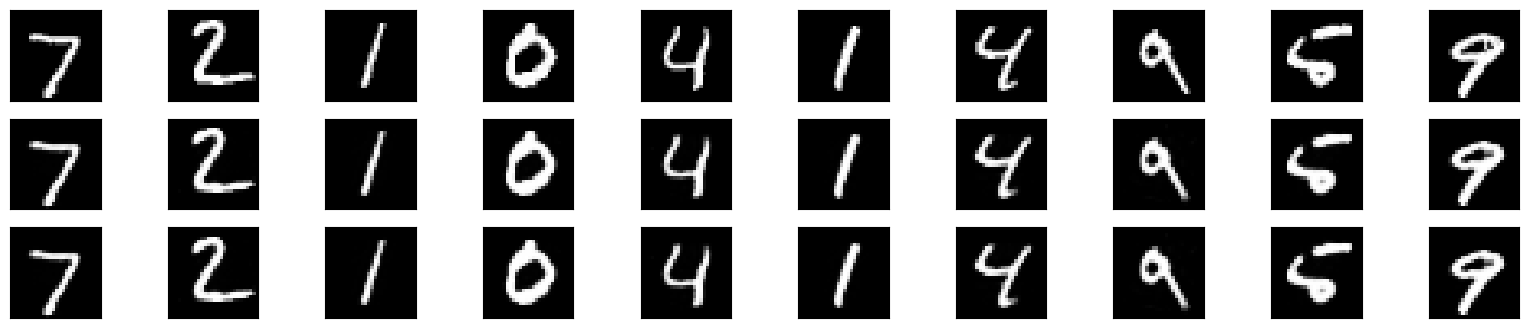

In [22]:
n = 10
plt.figure(figsize = (20, 4))

for i in range(n):
    # Original Images
    
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #Encoded Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #Decoded Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()